In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

In [50]:
warnings.filterwarnings('ignore')

In [51]:
dataset = pd.read_csv('Melbourne_housing_FULL.csv')
dataset.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0


In [52]:
cols = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount',
        'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
        'BuildingArea', 'Price']

In [53]:
dataset = dataset[cols]
dataset.shape

(7315, 15)

In [54]:
dataset.isna().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          1
Propertycount       1
Distance            0
CouncilArea         1
Bedroom2         1577
Bathroom         1577
Car              1577
Landsize         1583
BuildingArea     3998
Price            1685
dtype: int64

In [55]:
fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']

dataset[fill_zero] = dataset[fill_zero].fillna(0)

In [56]:
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.Landsize.mean())

In [57]:
dataset.dropna(inplace=True)

In [58]:
dataset = pd.get_dummies(dataset, drop_first=True)
dataset.head(2)

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Airport West,...,CouncilArea_Manningham City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Melbourne City Council,CouncilArea_Monash City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Moreland City Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Yarra City Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,463.017446,1480000.0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.000000,1035000.0,0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
x = dataset.drop('Price', axis=1)
y = dataset['Price']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [61]:
from sklearn import linear_model

reg = LinearRegression().fit(X_train, y_train)

In [62]:
reg.score(X_test, y_test)

-34.01586604102646

In [63]:
#L1 REGULAZATION
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)

lasso_reg.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

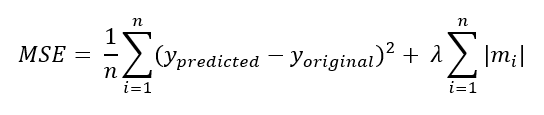

In [64]:
print(lasso_reg.score(X_test, y_test))
print(lasso_reg.score(X_train, y_train))

0.6800886430623508
0.7152073562670469


In [65]:
ridge_reg = linear_model.Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

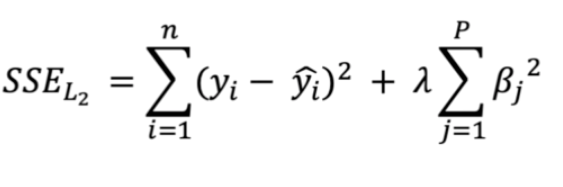

In [66]:
print(ridge_reg.score(X_test, y_test))
print(ridge_reg.score(X_train, y_train))

0.6771089671064714
0.6937923125887953
